<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/answers/%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95_1/answer%5B1%5D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解析解の導出
___

ポイント：変数分離法を用いて解析解を導く．(本当は詳細な説明も書こうかと思ったのですが，今回は割愛します．)

$$
\begin{eqnarray}
  \frac{dN}{dt}&=&-\lambda N \\
  \frac{dN}{N}&=&-\lambda dt \\
  \int \frac{dN}{N}&=&-\lambda\int dt\quad i.e., \quad \log{|N|}=-\lambda t+c\\
  N&=&\pm e^{-\lambda t+c}=\pm e^c e^{-\lambda t}
  =Ce^{-\lambda t}\quad&(\because C=\pm e^c)\\
  \therefore N&=&N_0e^{-\lambda t}\quad&(\because N(t_0=0)=N_0)\\
\end{eqnarray}
$$

# 演習問題 [1] (1)の解答
___

<Figure size 432x288 with 0 Axes>

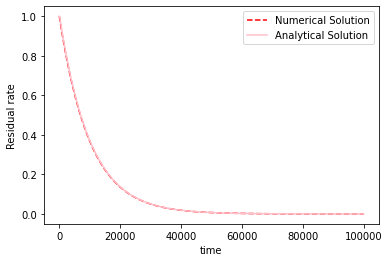

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# １階微分方程式
def f(t, N):
  return -lam * N
# 解析解
def g(t1, N1):
  return N_0 * np.exp(-lam*t1)

# 初期条件
lam = 1/10000
t_0 = 0
N_0 = 1
tmax = 100000

# 刻み幅の設定
m = 2**10
h = (tmax - t_0) /m

# 変域の設定
tpoints = np.arange(t_0, tmax, h)
t1points = np.arange(t_0, tmax, h)
# 計算結果を保存する配列の用意
Npoints = []
N1points = []

# 初期値の代入
t=t1=t_0
N=N1=N_0
# 数値積分
for t in tpoints:
    # 配列に要素を追加
    Npoints.append(N)
    # ルンゲ・クッタ法のアルゴリズム
    k1 = h * f(t, N)
    k2 = h * f(t+h/2, N+k1/2)
    k3 = h * f(t+h/2, N+k2/2)
    k4 = h * f(t+h, N+k3)
    N += (k1+2*k2+2*k3+k4)/6

# 解析解
for t1 in t1points:
    N1points.append(N1)
    N1 = g(t1, N1)

# グラフ用の各種設定
fig = plt.figure()
# グラフの背景色の設定
fig, ax = plt.subplots(facecolor = 'white')

ax.plot(tpoints, Npoints, '--', label = 'Numerical Solution', color = 'red')
ax.plot(t1points, N1points, '-', label = 'Analytical Solution', color = 'pink')
plt.xlabel('time')
plt.ylabel('Residual rate')
plt.legend(loc = 'best')